# Manual Tuning

In [5]:
# Loading Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score 
import warnings
warnings.filterwarnings('ignore')

# Loading Data
df = pd.read_csv('C:/Users/Shubham/Documents/Data Science/Notebooks/00. Data_Store/preprocessed_diabetes.csv')

# Splitting into Features and Target
x = df.drop(["Outcome"], axis=1)
y = df["Outcome"]

# Splitting into Train Test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=33)

# Manually giving the parameters to RandomForestClassifier model

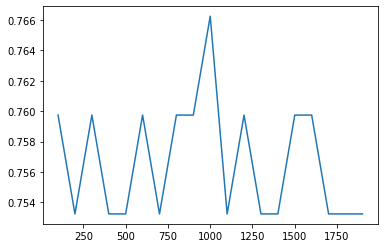

In [9]:
score = []

for i in range(100,2000, 100):
    model = RandomForestClassifier(
                 n_estimators=i,
                 criterion = 'gini',
                 max_features = 'sqrt',
                 min_samples_leaf = 5,
                 random_state = 33
                 )
    model.fit(x_train, y_train)
    
    score.append(model.score(x_test, y_test))
    
plt.plot(range(100,2000,100), score)

### Selecting n_estimators to be 1000

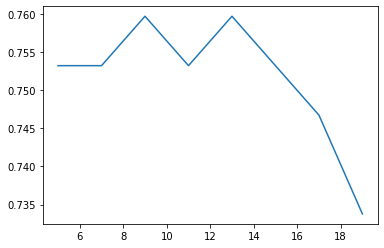

In [11]:
score = []

for i in range(5,20,2):
    model = RandomForestClassifier(
                 n_estimators=500,
                 criterion = 'gini',
                 max_features = 'sqrt',
                 min_samples_leaf = i,
                 random_state = 33
                 )
    model.fit(x_train, y_train)
    
    score.append(model.score(x_test, y_test))
    
plt.plot(range(5,20,2), score)

### Selecting min_samples_leaf = 9

In [12]:
model = RandomForestClassifier(
                 n_estimators=1000,
                 criterion = 'gini',
                 max_features = 'sqrt',
                 min_samples_leaf = 9,
                 random_state = 33
                 )

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# Evaluating the model

0.7597402597402597
AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.78      0.88      0.82        99
           1       0.71      0.55      0.62        55

    accuracy                           0.76       154
   macro avg       0.75      0.71      0.72       154
weighted avg       0.75      0.76      0.75       154



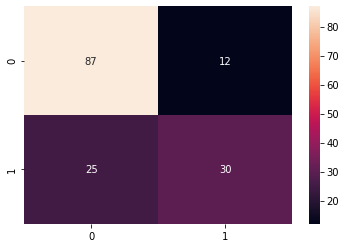

In [13]:
print(model.score(x_test, y_test))
print(sns.heatmap(confusion_matrix(y_test, y_pred), annot=True))
print(classification_report(y_test, y_pred))